# Współczesne metody heurystyczne
## PB14 - Wykorzystanie algorytmu ewolucyjnego do doboru parametrów SVM do zadania klasyfikacji
### Agnieszka Czaplicka, Bartosz Sowul

# test: instalacja potrzebnych modułów

In [1]:
%matplotlib inline
!pip install pathos
!pip install tqdm
!pip install matplotlib
!pip install pandas
!pip install numexpr
!pip install numpy
!pip install scikit_learn

## test: czy jupyter widzi nasz moduł?

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -0.1325397522295571



gen: 5
avg time per gen: 0.6
Best params:
C: 75.80481833134047
Gamma: 3.7789052787565094
neg_log_loss: -0.17660446293845966



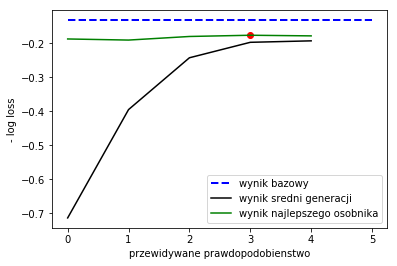

In [2]:
from ga.evoalgo_svm import EvoAlgo

from sklearn.datasets import load_iris
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
ea = EvoAlgo(clf, pop_members=60, max_iter=5)
iris = load_iris()
ea.fit(iris.data, iris.target)

ea.get_params()
ea.plot()

## Funkcja pomocniczna do zapisu wyników eksperymentów do pliku csv

In [3]:
import csv
from pathlib import Path

def save_results(results, filename='results.csv'):
    mode = 'w'
    path = Path(filename)
    if path.is_file():
         mode = 'a'
    with open(filename, mode) as f:
        w = csv.writer(f)
        if mode == 'w':
            w.writerow(results[0].keys())
        else:
            pass
        for result in results:
            w.writerow(result.values())

## Ładowanie danych

In [4]:
import numpy as np
from collections import OrderedDict


class DataSet:
    def __init__(self, data, target):
        self.data = data
        self.target = target


def load_data(name, concatenate_classes=False):
    filename = "./../data/rs_training_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    train = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
        
    filename = "./../data/rs_testing_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    print(np.shape(data))
    test = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
    
    # przeksztalcenie danych do zakresu [-1,1]
    max_train = np.amax(train.data, axis=0)
    min_train = np.amin(train.data, axis=0)
    train.data = 2 * (train.data - min_train) / (max_train - min_train) - 1
    test.data = 2 * (test.data - min_train) / (max_train - min_train) - 1
    
    if concatenate_classes == True:
        train.target = (np.around(train.target / 10)) * 10
        test.target = (np.around(test.target / 10)) * 10
    
    target_list = sorted(list(OrderedDict.fromkeys(train.target)))

    print(list(target_list))
    
    return train, test
  

train, test = load_data('tani', True)
print('Train:')
print(train.data[5, :])
print(train.target[5])
print('\nTest:')
print(test.data[5, :])
print(test.target[5])

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Train:
[ 0.02466793  0.02466793  0.2019061   0.02466793  0.02466793 -0.20191195
  0.02466793  0.02466793  0.20191055  0.00071994  0.04210526  0.16868381
  0.06803131  0.08515815 -0.25231478  0.09891435  0.10382514  0.25722737
  0.16972814  0.21500722  0.17168869  0.25104022  0.25801953 -0.2024012
  0.26880223  0.26564673  0.20206982  0.00071994  0.04210526  0.16868384
  0.06803131  0.08515815 -0.25231478  0.09891435  0.10382514  0.25722738]
-10.0

Test:
[ 0.12333966  0.12144213  0.29813691  0.12333966  0.12144213 -0.29814314
  0.12333966  0.12144213  0.29814163  0.06983441  0.10789474  0.23810495
  0.13064419  0.14841849 -0.32388161  0.16164053  0.16575592  0.3294971
  0.24467303  0.28860029  0.26601474  0.32316227  0.32914923 -0.29859227
  0.33983287  0.33657858  0.29829273  0.06983441  0.10789474  0.23810498
  0.13064419  0.14841849 -0.32388162  0.16164053  0.16575592  0.3294971 ]
10.0


## Testowanie programu

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

(102, 37)
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
Base score: -2.3430127100323572



gen: 5
avg time per gen: 0.3
Best params:
C: 53.963980339478645
Gamma: 5.522724483638952
neg_log_loss: -2.2571597085838215



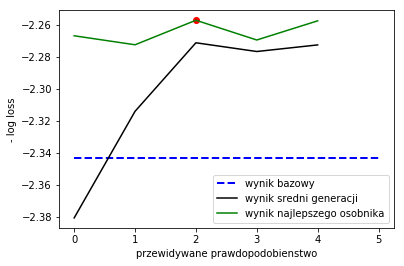

Generation:  10%|█         | 1/10 [00:00<00:01,  5.71it/s]

Base score: -2.477362477428179



gen: 10
avg time per gen: 0.3
Best params:
C: 17.98281358755237
Gamma: 2.036020393475668
neg_log_loss: -2.255277228661535



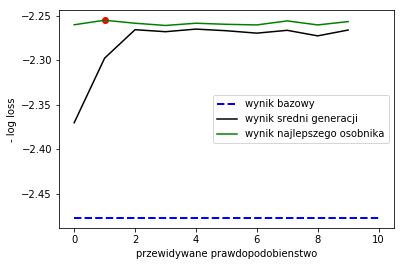

Generation:   5%|▌         | 1/20 [00:00<00:02,  7.12it/s]

Base score: -2.3441633174063154



gen: 20
avg time per gen: 0.9
Best params:
C: 51.4052447098199
Gamma: 3.457298025806599
neg_log_loss: -2.2465868208701085



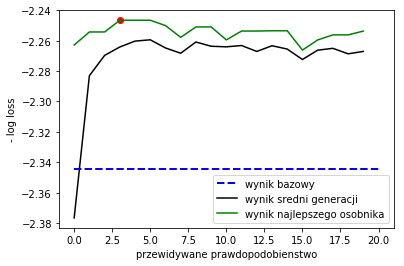

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4307754583454386



gen: 5
avg time per gen: 0.5
Best params:
C: 45.5869086769914
Gamma: 3.77801013773911
neg_log_loss: -2.248426695122913



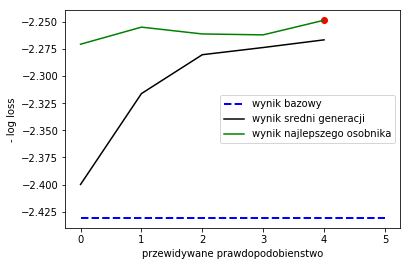

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.449420070393379



gen: 10
avg time per gen: 0.6
Best params:
C: 9.46179652931866
Gamma: 4.987530900856539
neg_log_loss: -2.2358611795432437



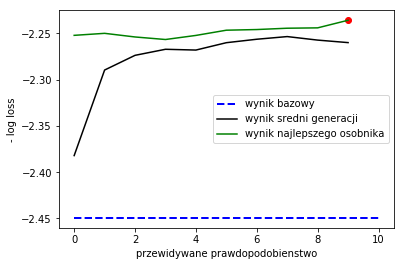

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.453242718309796



gen: 20
avg time per gen: 0.7
Best params:
C: 37.8977038461462
Gamma: 0.05733873430624481
neg_log_loss: -2.0205343733214853



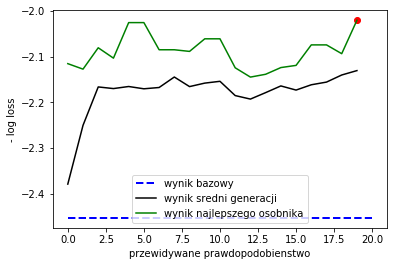

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -2.4607660286507094



gen: 5
avg time per gen: 0.8
Best params:
C: 40.55433565505029
Gamma: 5.298191854540527
neg_log_loss: -2.2494597880240548



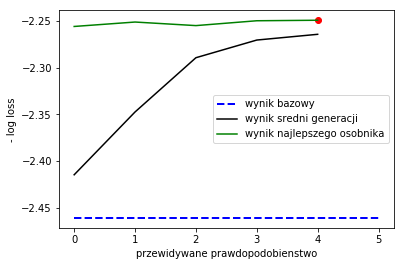

Generation:   0%|          | 0/10 [00:00<?, ?it/s]

Base score: -2.404031599043998



gen: 10
avg time per gen: 1.0
Best params:
C: 56.052093142674835
Gamma: 4.327622668414068
neg_log_loss: -2.2424652179818434



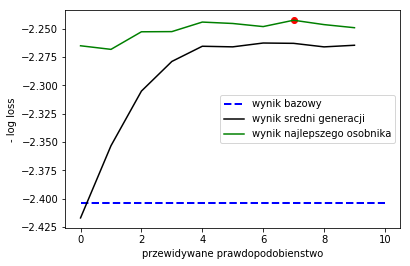

Generation:   0%|          | 0/20 [00:00<?, ?it/s]

Base score: -2.562681573444826



gen: 20
avg time per gen: 1.4
Best params:
C: 83.01195766775872
Gamma: 3.805743999072212
neg_log_loss: -2.246198501692829



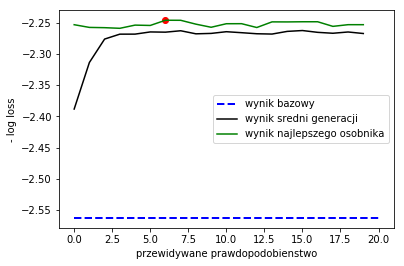

In [5]:
from itertools import product

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

from ga.evoalgo_svm import EvoAlgo

def test_EA(train, test, pop_members, max_iter):
    
    combinations = list(product(pop_members, max_iter))
    
    clf_train = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
    
    results = []
    
    for pop, it in combinations:
        ea = EvoAlgo(clf_train, pop_members=pop, max_iter=it)
        ea.fit(train.data, train.target)
        ea.get_params()

        results.append({
                        'pop': pop,
                        'iter': it,
                        'gen_num': ea._best_score.gen_num,
                        'C': ea._best_score.params[0],
                        'Gamma': ea._best_score.params[1],
                        'cv_score': ea._best_score.score
                       })

        ea.plot()

        clf_test = SVC(kernel='rbf', probability=True, C=results[-1]['C'], gamma=results[-1]['Gamma'])
        clf_test.fit(train.data, train.target)
        y_pred = clf_test.predict(test.data)
        y_pred_proba = clf_test.predict_proba(test.data)

        results[-1]['log_loss'] = log_loss(test.target, y_pred_proba)
        results[-1]['accuracy'] = accuracy_score(test.target, y_pred)
    
    return results

train, test = load_data('drogi', True)
pop_members = [10, 20, 40]
max_iter = [5, 10, 20]
results = test_EA(train, test, pop_members, max_iter)
save_results(results, 'results.csv')

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.